<a href="https://colab.research.google.com/github/physicaone/loss_IG/blob/master/%5B210617%5Dvisual_results4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    base='drive/MyDrive'
except:
    base='Google Drive'

Mounted at /content/drive


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [75]:
n_hid_list=[1, 2, 4, 8, 12, 16]
T_list=[1.47, 1.78, 2.3, 5.2,16]
color_list=['red', 'orange', 'green', 'blue', 'purple']
n_beta=5

In [76]:
cum1=[]; cum2=[]; means=[]
for T in T_list:
    tmp1=[]; tmp2=[]; tmp3=[]
    S=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_T={T}_S.pkl'.format(base=base, T=T))
    for n_hid in n_hid_list:
        bias_2nd_cumulant1=0; bias_2nd_cumulant2=0
        FE=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_PT{n_beta}_n_hid={n_hid}_T={T}_FE.pkl'.format(base=base, n_beta=n_beta, n_hid=n_hid, T=T))
        FE_V=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_n_hid={n_hid}_T={T}_FE_V.pkl'.format(base=base, n_hid=n_hid, T=T))
        bias_CM=-S['CM']-FE['CM']+FE_V['CM']
        bias_mean=0
        for m in range(10):
            bias_CM_m=-S['CM_m'][str(m)]-FE['CM_m'][str(m)]+FE_V['CM_m'][str(m)]
            for n in range(10):
                bias_tmp_mn=-S['CM']-FE['mn'][str(m)][str(n)]+FE_V['mn'][str(m)][str(n)]
                bias_2nd_cumulant1+=(bias_CM-bias_tmp_mn)**2 
                bias_2nd_cumulant2+=(bias_CM_m-bias_tmp_mn)**2
                bias_mean+=bias_tmp_mn/100
        tmp1.append(bias_2nd_cumulant1)
        tmp2.append(bias_2nd_cumulant2)
        tmp3.append(bias_mean)
    cum1.append(tmp1)
    cum2.append(tmp2)
    means.append(tmp3)

([<matplotlib.axis.XTick at 0x7f11199c4390>,
 [Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '4'),
  Text(0, 0, '8'),
  Text(0, 0, '12'),
  Text(0, 0, '16')])

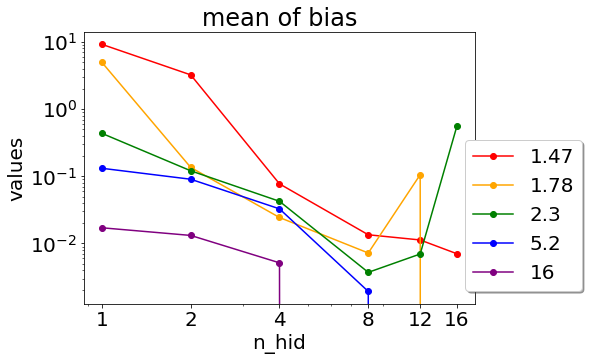

In [77]:
plt.rcParams["font.size"] = "20"
plt.figure(figsize=(7,5))

plt.title('mean of bias')
plt.xscale('log'); 
plt.yscale('log')
# CM
for i in range(len(T_list)):
    plt.plot(n_hid_list, means[i], '-o', c=color_list[i], label = T_list[i])

plt.legend(loc='lower right', bbox_to_anchor=(1.3, 0.01), 
           ncol=1, fancybox=True, shadow=True)
plt.xlabel('n_hid')
plt.ylabel('values')
plt.xticks([1,2,4,8,12,16],n_hid_list)

([<matplotlib.axis.XTick at 0x7f4284984590>,
 [Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '4'),
  Text(0, 0, '8'),
  Text(0, 0, '12'),
  Text(0, 0, '16')])

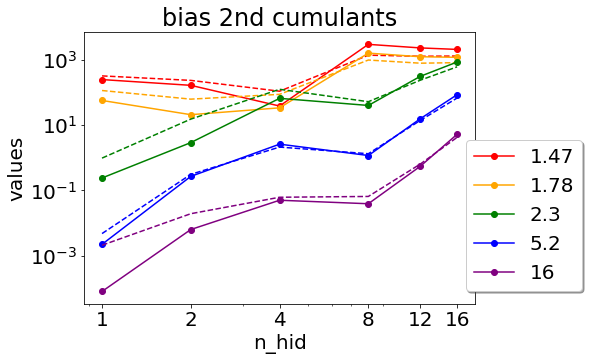

In [53]:
plt.rcParams["font.size"] = "20"
plt.figure(figsize=(7,5))

plt.title('bias 2nd cumulants')
plt.xscale('log'); plt.yscale('log')
# CM
for i in range(len(T_list)):
    plt.plot(n_hid_list, cum1[i], '-o', c=color_list[i], label = T_list[i])
    plt.plot(n_hid_list, cum2[i], '--', c=color_list[i])

plt.legend(loc='lower right', bbox_to_anchor=(1.3, 0.01), 
           ncol=1, fancybox=True, shadow=True)
plt.xlabel('n_hid')
plt.ylabel('values')
plt.xticks([1,2,4,8,12,16],n_hid_list)

In [39]:
std1=[]; std2=[]; mean1=[]
for T in T_list:
    tmp1=[]; tmp2=[]; tmp3=[]
    S=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_T={T}_S.pkl'.format(base=base, T=T))
    for n_hid in n_hid_list:
        FE=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_PT{n_beta}_n_hid={n_hid}_T={T}_FE.pkl'.format(base=base, n_beta=n_beta, n_hid=n_hid, T=T))
        FE_V=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_n_hid={n_hid}_T={T}_FE_V.pkl'.format(base=base, n_hid=n_hid, T=T))
        list_CM=[]; list_CM_m_std=[]; list_bias=[]
        for m in range(10):
            list_CM_m=[]
            for n in range(10):
                bias_mn=-S['CM_m'][str(m)]-FE['mn'][str(m)][str(n)]+FE_V['mn'][str(m)][str(n)]
                list_CM.append(bias_mn); list_CM_m.append(bias_mn)
                list_bias.append(bias_mn)
            list_CM_m_std.append(np.std(list_CM_m))
        tmp1.append(np.std(list_CM))
        tmp2.append(np.mean(list_CM_m_std))
        tmp3.append(np.mean(list_bias))
    std1.append(tmp1)
    std2.append(tmp2)
    mean1.append(tmp3)
# CM, CM_m을 이상모델 삼은 IG variance의 표준편차

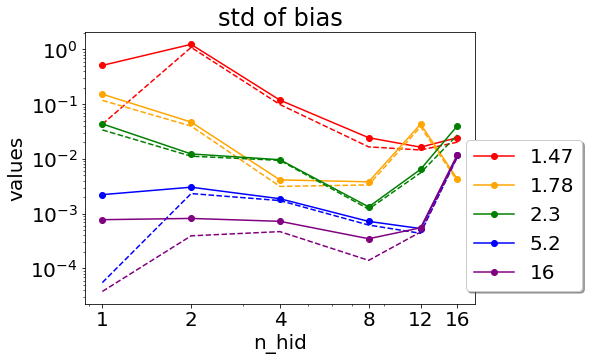

In [40]:
plt.rcParams["font.size"] = "20"
plt.figure(figsize=(7,5))

plt.xlabel('n_hid')
plt.ylabel('values')
plt.title('std of bias')
plt.xscale('log'); plt.yscale('log')

for i in range(len(T_list)):
    plt.plot(n_hid_list, std1[i], '-o', c=color_list[i], label = T_list[i])
    plt.plot(n_hid_list, std2[i], '--', c=color_list[i])

plt.xticks([1,2,4,8,12,16],n_hid_list)
plt.legend(loc='lower right', bbox_to_anchor=(1.3, 0.01), 
           ncol=1, fancybox=True, shadow=True)
plt.show()

In [18]:
Var1=[]; Var2=[]
for T in T_list:
    tmp1=[]; tmp2=[]
    for n_hid in n_hid_list:
        FE=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_PT{n_beta}_n_hid={n_hid}_T={T}_FE.pkl'.format(base=base, n_beta=n_beta, n_hid=n_hid, T=T))
        dE=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_PT{n_beta}_n_hid={n_hid}_T={T}_dE.pkl'.format(base=base, n_beta=n_beta, n_hid=n_hid, T=T))
        Variance1=0; Variance2=0
        for m in range(10):
            for n in range(10):
                Variance1+=(dE['CM'][str(m)][str(n)]-FE['mn'][str(m)][str(n)]+FE['CM'])/100
                Variance2+=(dE['CM_m'][str(m)][str(n)]-FE['mn'][str(m)][str(n)]+FE['CM_m'][str(m)])/100
        tmp1.append(Variance1)
        tmp2.append(Variance2)
    Var1.append(tmp1)
    Var2.append(tmp2)
# CM, CM_m을 이상모델 삼은 IG variance의 표준편차

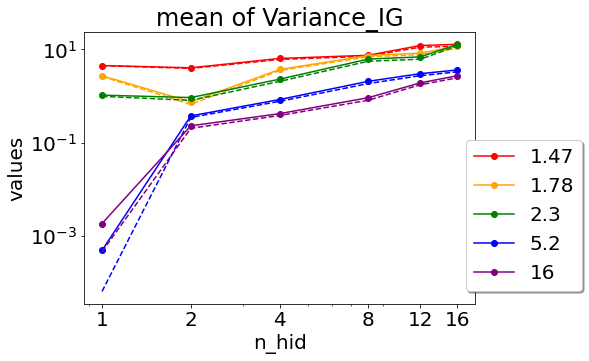

In [19]:
plt.rcParams["font.size"] = "20"
plt.figure(figsize=(7,5))

plt.xlabel('n_hid')
plt.ylabel('values')
plt.title('mean of Variance_IG')
plt.xscale('log')
plt.yscale('log')
for i in range(len(T_list)):
    plt.plot(n_hid_list, Var1[i], '-o', c=color_list[i], label = T_list[i])
    plt.plot(n_hid_list, Var2[i], '--', c=color_list[i])

plt.xticks([1,2,4,8,12,16],n_hid_list)
plt.legend(loc='lower right', bbox_to_anchor=(1.3, 0.01), 
           ncol=1, fancybox=True, shadow=True)
plt.show()

In [20]:
def get_df(T):
    dict0={}
    for m in range(10):
        dict0[str(m)]=[]
        for n in range(10):
            value1=[]; value2=[]; bias_list=[]
            for n_hid in n_hid_list:
                FE=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_PT{n_beta}_n_hid={n_hid}_T={T}_FE.pkl'.format(base=base, n_beta=n_beta, n_hid=n_hid, T=T))
                FE_V=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_n_hid={n_hid}_T={T}_FE_V.pkl'.format(base=base, n_hid=n_hid, T=T))
                S=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_T={T}_S.pkl'.format(base=base, T=T))

                value1.append(np.round(dE['CM_m'][str(m)][str(n)]-FE['mn'][str(m)][str(n)]+FE['CM_m'][str(m)],3))
                value2.append(np.round(dE['CM'][str(m)][str(n)]-FE['mn'][str(m)][str(n)]+FE['CM'],3))
                bias_list.append(np.round(-S['CM_m'][str(m)]-FE['mn'][str(m)][str(n)]+FE_V['mn'][str(m)][str(n)],3))

            dict0[str(m)].append({'var_CM':value2, 'var_CM_m':value1, 'bias':bias_list})
    df = pd.DataFrame(data=dict0)
    pd.set_option('display.max_colwidth', None)
    return df


In [21]:
# df.to_csv('{base}/loss_IG/3*3/data/3*3_PT20_0.1M_T={T}_dataframe.csv'.format(base=base, T=T), index=range(10))

In [71]:
Bias_dict={}
for T in T_list:
    df=get_df(str(T))
    Bias_dict[str(T)]={}
    n_hid_index=-1
    for n_hid in n_hid_list:
        n_hid_index+=1
        Bias_dict[str(T)][str(n_hid)]={}
        Bias_by_m=[]
        for m in range(10):
            Bias_mean=0
            for n in range(10):
                Bias_mean+=df[str(m)][n]['bias'][n_hid_index]/10
            Bias_by_m.append(Bias_mean)
        Bias_dict[str(T)][str(n_hid)]=Bias_by_m

Variance_dict_CM={}
for T in T_list:
    df=get_df(str(T))
    Variance_dict_CM[str(T)]={}
    n_hid_index=-1
    for n_hid in n_hid_list:
        n_hid_index+=1
        Variance_dict_CM[str(T)][str(n_hid)]={}
        Variance_by_m=[]
        for m in range(10):
            Variance_mean=0
            for n in range(10):
                Variance_mean+=df[str(m)][n]['var_CM'][n_hid_index]/10
            Variance_by_m.append(Variance_mean)
        Variance_dict_CM[str(T)][str(n_hid)]=Variance_by_m

Variance_dict_CM_m={}
for T in T_list:
    df=get_df(str(T))
    Variance_dict_CM_m[str(T)]={}
    n_hid_index=-1
    for n_hid in n_hid_list:
        n_hid_index+=1
        Variance_dict_CM_m[str(T)][str(n_hid)]={}
        Variance_by_m=[]
        for m in range(10):
            Variance_mean=0
            for n in range(10):
                Variance_mean+=df[str(m)][n]['var_CM_m'][n_hid_index]/10
            Variance_by_m.append(Variance_mean)
        Variance_dict_CM_m[str(T)][str(n_hid)]=Variance_by_m


In [ ]:
Variance_dict_CM_m

([<matplotlib.axis.XTick at 0x7f1119889550>,
 [Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, ''),
  Text(0, 0, '4'),
  Text(0, 0, ''),
  Text(0, 0, '8'),
  Text(0, 0, ''),
  Text(0, 0, '16')])

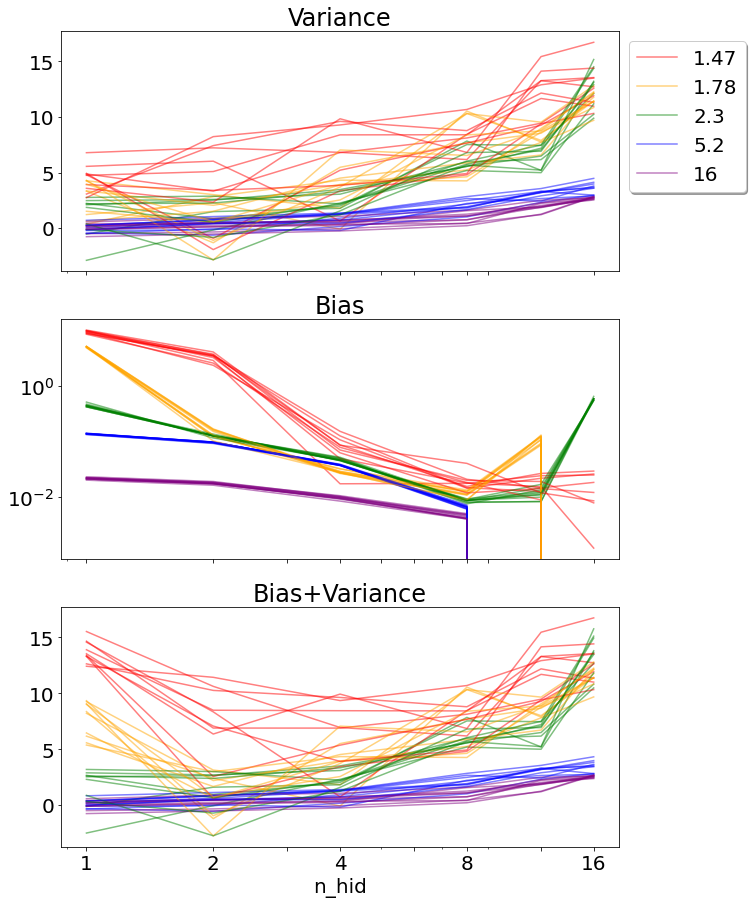

In [73]:
plt.figure(figsize=(10,15))
alpha=0.5
plt.subplot(3, 1, 1)
plt.rcParams["font.size"] = "20"
plt.title('Variance')
plt.xscale('log')
# plt.yscale('log')
for m in range(10):
    for t in range(len(T_list)):
        plt.plot(n_hid_list, np.array(list(Variance_dict_CM[str(T_list[t])].values())).transpose()[m], c=color_list[t], alpha=alpha)
plt.xticks([1,2,3,4,5,6,7,8,9,16],[])
plt.legend(T_list,  bbox_to_anchor=(1, 1), 
        ncol=1, fancybox=True, shadow=True)
plt.subplot(3, 1, 2)
plt.rcParams["font.size"] = "20"
plt.title('Bias')
plt.xscale('log')
plt.yscale('log')
for m in range(10):
    for t in range(len(T_list)):
        plt.plot(n_hid_list, np.array(list(Bias_dict[str(T_list[t])].values())).transpose()[m], c=color_list[t], alpha=alpha)
plt.xticks([1,2,3,4,5,6,7,8,9,16],[])

plt.subplot(3, 1, 3)
plt.rcParams["font.size"] = "20"
plt.title('Bias+Variance')
plt.xscale('log')
for m in range(10):
    for t in range(len(T_list)):
        plt.plot(n_hid_list, np.array(list(Bias_dict[str(T_list[t])].values())).transpose()[m]+
             np.array(list(Variance_dict_CM[str(T_list[t])].values())).transpose()[m], c=color_list[t], label = T_list[t], alpha=alpha, linestyle='-')


plt.xlabel('n_hid')
plt.xticks([1,2,3,4,6,8,12,16],[1,2,'',4,'' ,8,'',16])


In [34]:
def get_hist(list00):
#     bins=range(int(min(list00)-1), int(max(list00)+1), 1)
    # bins=[0.001*(1.5**x) for x in range(29)]
    y1,x1,_ = plt.hist(list00, bins = 100, histtype='step')
    x1 = 0.5*(x1[1:]+x1[:-1])
    plt.close()
    return x1, y1

In [24]:
JSs={}
for T in T_list:

    JSs[str(T)]={}
    for n_hid in n_hid_list:
        JS=[]
        dE10000=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_PT{n_beta}_n_hid={n_hid}_T={T}_dE10000.pkl'.format(base=base, n_beta=n_beta, n_hid=n_hid, T=T))
        FE=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_PT{n_beta}_n_hid={n_hid}_T={T}_FE.pkl'.format(base=base, n_beta=n_beta, n_hid=n_hid, T=T))

        for i in range(100):
            i=str(i).zfill(2)
            for j in range(100):
                j=str(j).zfill(2)
                if i>j:
                    if i[0]==j[0]:
                        # if (dE10000[i][j]+dE10000[j][i])<0:
                        #     JS.append(0)
                        # else:
                        JS.append(0.5*(dE10000[i][j]+dE10000[j][i]))
                        # JS.append(dE10000[i][j]-FE['mn'][j[0]][j[1]]+FE['mn'][i[0]][i[1]])
        JSs[str(T)][str(n_hid)]=JS

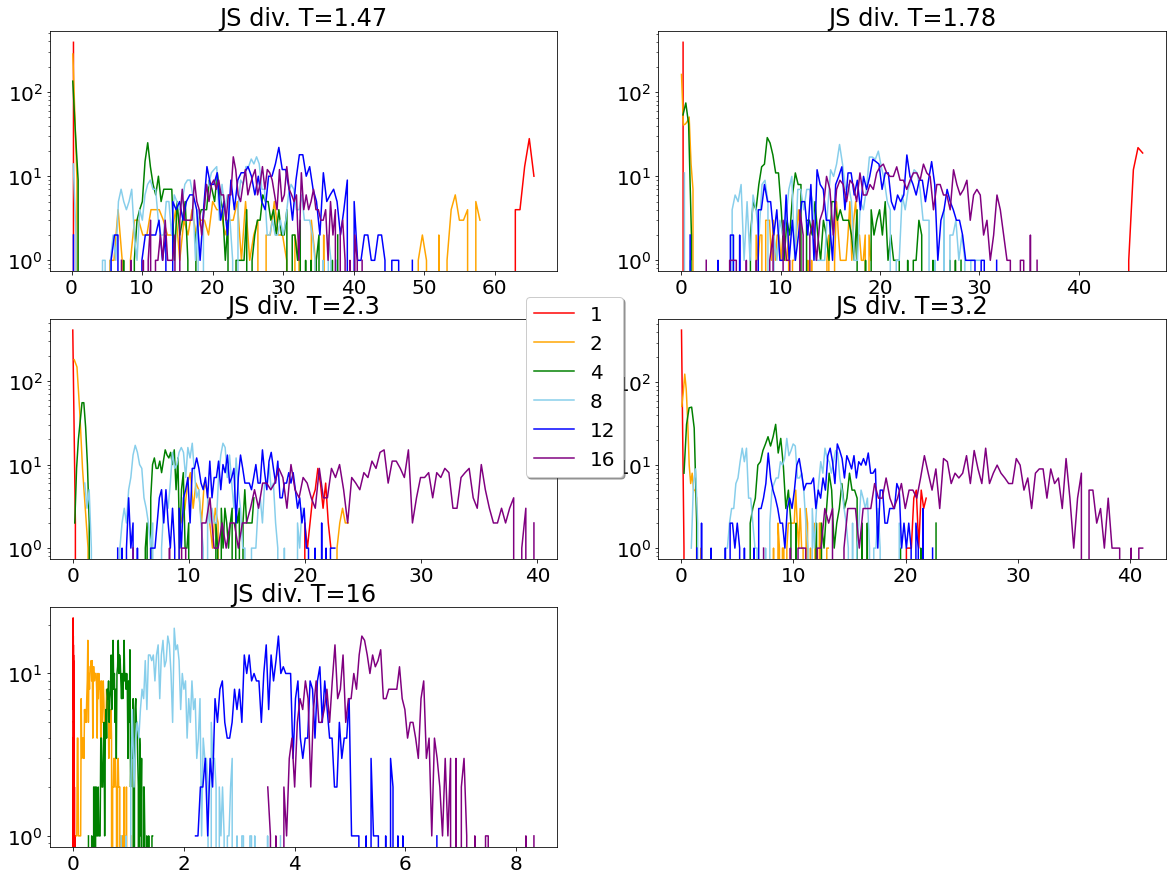

In [25]:
x_dict={}
y_dict={}
for T in T_list:
    x_dict[str(T)]={}
    y_dict[str(T)]={}
    for n_hid in n_hid_list:
        x1, y1=get_hist(JSs[str(T)][str(n_hid)])
        x_dict[str(T)][str(n_hid)]=x1
        y_dict[str(T)][str(n_hid)]=y1

plt.figure(figsize=(20,15))

for i in range(1, len(T_list)+1):
    T=str(T_list[i-1])
    plt.subplot(3, 2, i)
    plt.rcParams["font.size"] = "20"
    plt.title('JS div. T={T}'.format(T=T))

    for n in range(len(n_hid_list)):
        plt.plot(x_dict[T][str(n_hid_list[n])], y_dict[T][str(n_hid_list[n])], c=color_list[n], label = n_hid_list[n])
    plt.yscale('log')
    # plt.xlim(0, 60)
    # plt.ylim(1, 10000)
plt.legend(loc='lower right', bbox_to_anchor=(1.15,1.5), 
    ncol=1, fancybox=True, shadow=True)

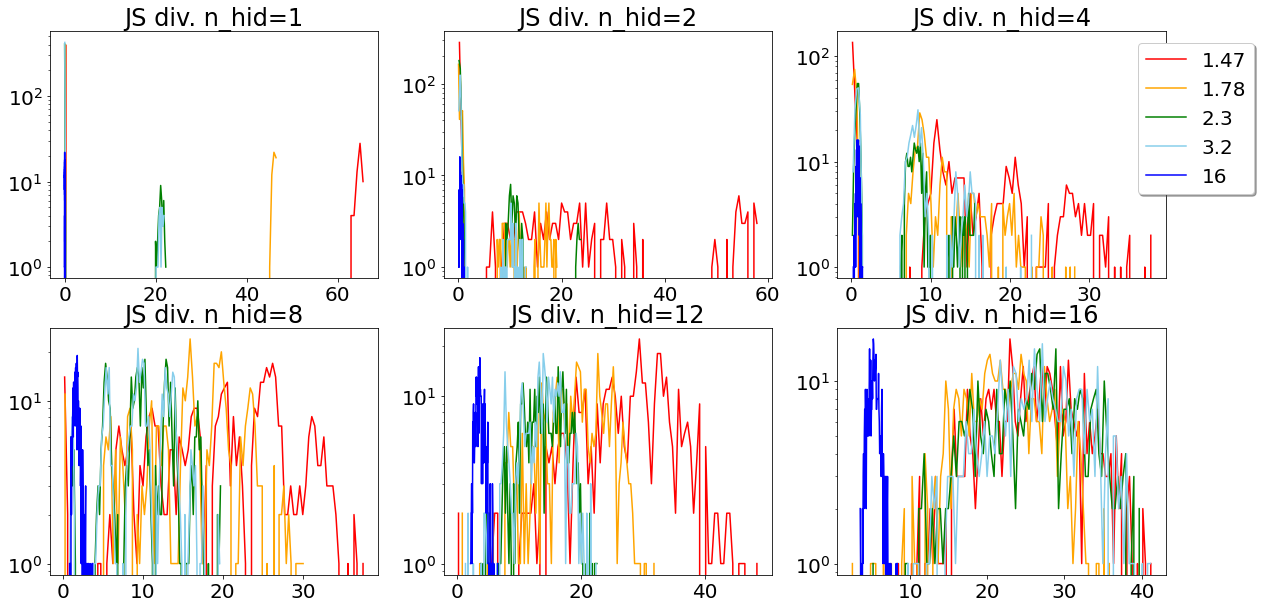

In [27]:
x_dict={}
y_dict={}
for T in T_list:
    x_dict[str(T)]={}
    y_dict[str(T)]={}
    for n_hid in n_hid_list:
        x1, y1=get_hist(JSs[str(T)][str(n_hid)])
        x_dict[str(T)][str(n_hid)]=x1
        y_dict[str(T)][str(n_hid)]=y1

plt.figure(figsize=(20,10))

for i in range(1, len(n_hid_list)+1):
    n_hid=str(n_hid_list[i-1])
    plt.subplot(2, 3, i)
    plt.rcParams["font.size"] = "20"
    plt.title('JS div. n_hid={n_hid}'.format(n_hid=n_hid))
    for t in range(len(T_list)):
        plt.plot(x_dict[str(T_list[t])][str(n_hid)], y_dict[str(T_list[t])][str(n_hid)], c=color_list[t], label = T_list[t])
    

    plt.yscale('log')
    # plt.xlim(0, 60)
plt.legend(loc='lower right', bbox_to_anchor=(1.3, 1.5), 
        ncol=1, fancybox=True, shadow=True)
    # plt.ylim(1, 10000)

In [35]:
n_vis=9
Weights={}
for T in T_list:
    Weights[str(T)]={}
    for n_hid in n_hid_list:
        Weight=[]
        params=pd.read_pickle('{base}/loss_IG/3*3/state_dict/n_hid={n_hid}_T={T}_mn.pkl'.format(base=base, n_hid=n_hid, T=T))
        for m in range(10):
            for n in range(10):
                Weight=Weight+params[str(m)][str(n)]['W'].view(n_hid*n_vis).tolist()
        Weights[str(T)][str(n_hid)]=Weight

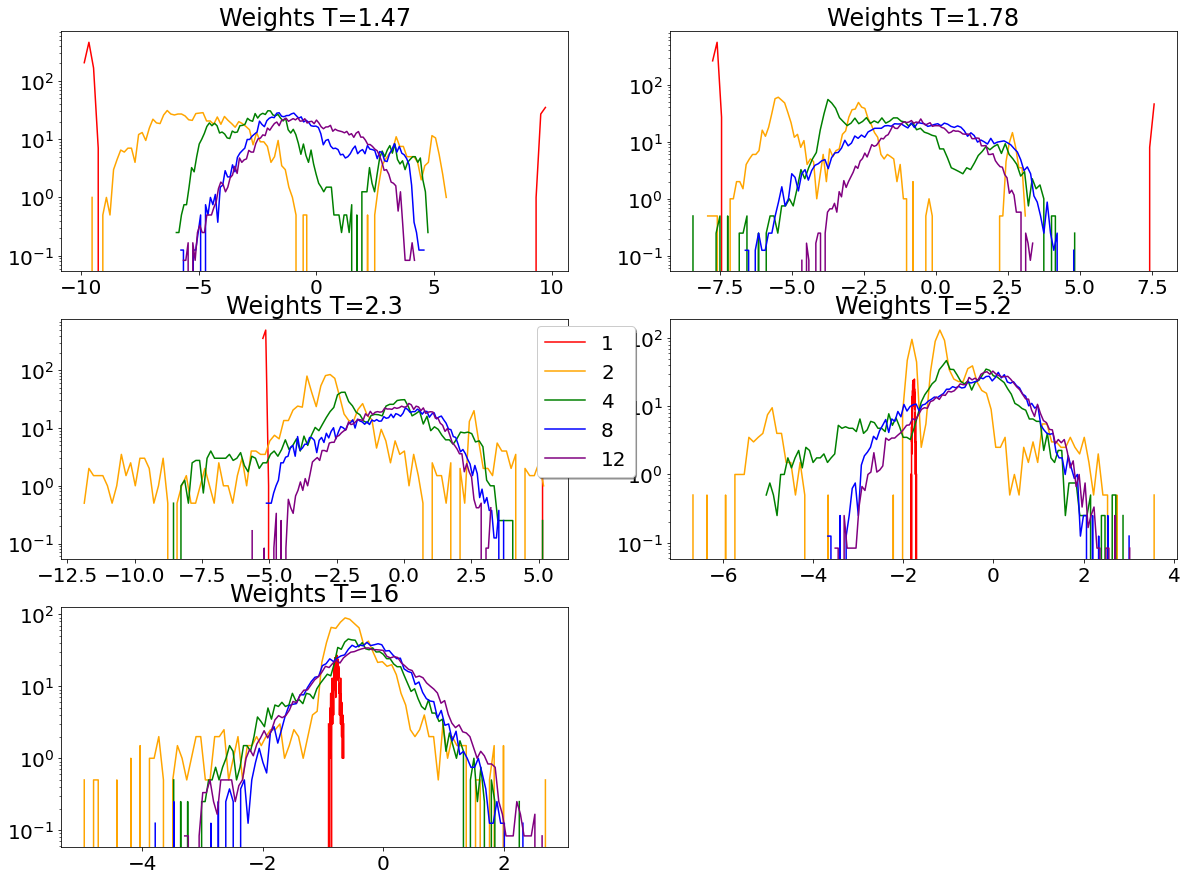

In [46]:
x_dict={}
y_dict={}
for T in T_list:
    x_dict[str(T)]={}
    y_dict[str(T)]={}
    for n_hid in n_hid_list:
        x1, y1=get_hist(Weights[str(T)][str(n_hid)])
        x_dict[str(T)][str(n_hid)]=x1
        y_dict[str(T)][str(n_hid)]=y1

plt.figure(figsize=(20,15))

for i in range(1, 6):
    T=str(T_list[i-1])
    plt.subplot(3, 2, i)
    plt.rcParams["font.size"] = "20"
    plt.title('Weights T={T}'.format(T=T))

    for n in range(len(T_list)):
        plt.plot(x_dict[T][str(n_hid_list[n])], y_dict[T][str(n_hid_list[n])]/n_hid_list[n], c=color_list[n], label = n_hid_list[n])
    plt.yscale('log')
    # plt.xlim(0, 60)
    # plt.ylim(1, 10000)
plt.legend(loc='lower right', bbox_to_anchor=(1.15,1.5), 
    ncol=1, fancybox=True, shadow=True)

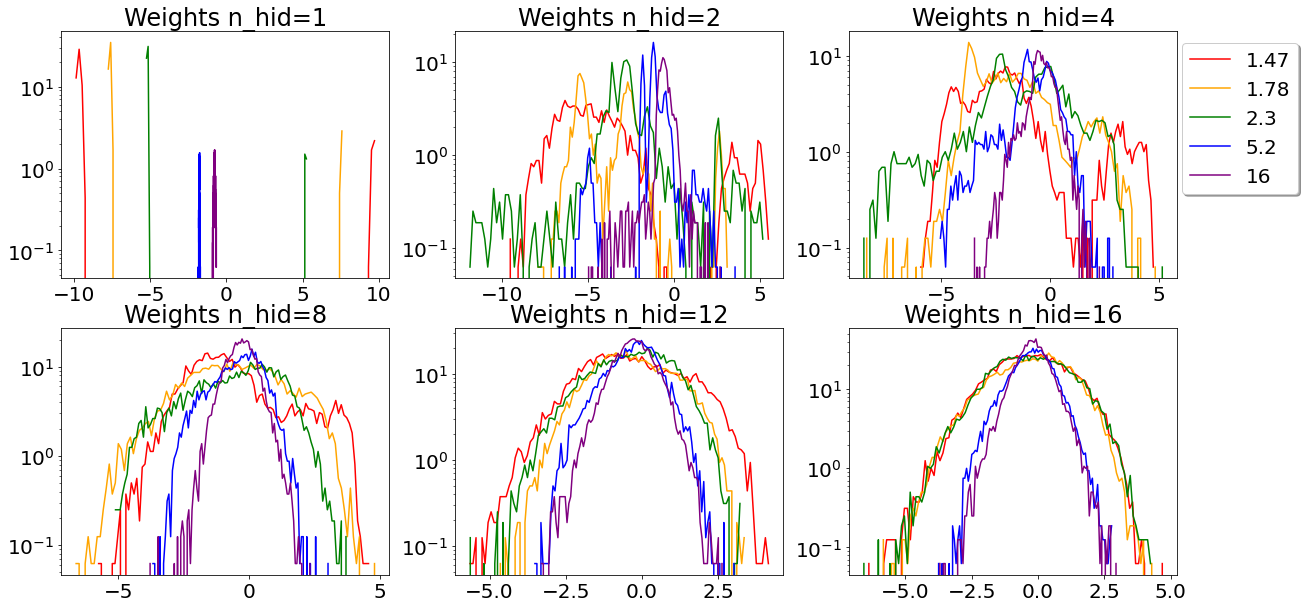

In [40]:
x_dict={}
y_dict={}
for T in T_list:
    x_dict[str(T)]={}
    y_dict[str(T)]={}
    for n_hid in n_hid_list:
        x1, y1=get_hist(Weights[str(T)][str(n_hid)])
        x_dict[str(T)][str(n_hid)]=x1
        y_dict[str(T)][str(n_hid)]=y1

plt.figure(figsize=(20,10))

for i in range(1, 7):
    n_hid=str(n_hid_list[i-1])
    plt.subplot(2, 3, i)
    plt.rcParams["font.size"] = "20"
    plt.title('Weights n_hid={n_hid}'.format(n_hid=n_hid))
    for t in range(len(T_list)):
        plt.plot(x_dict[str(T_list[t])][str(n_hid)], y_dict[str(T_list[t])][str(n_hid)]/n_hid_list[n], c=color_list[t], label = T_list[t])
    

    plt.yscale('log')
    # plt.xlim(0, 60)
plt.legend(loc='lower right', bbox_to_anchor=(1.4, 1.5), 
        ncol=1, fancybox=True, shadow=True)
    # plt.ylim(1, 10000)